# 0. Importing Libraries

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing ML Libraries

import sklearn

# To split train-test data
from sklearn.model_selection import train_test_split

# For Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

# For building LR model usign statsmodel
import statsmodels.api as sm

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# To calculate VIF usingf statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Residual Analysis
from sklearn.metrics import r2_score

# 1. Reading the data

In [3]:
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There are no null values

# 2. Mapping non-binary columns to their respective values

* mnth
* season
* weekday
* weathersit



In [5]:
def mnth_map(x):
    return x.map({
        1: "Jan", 
        2: "Feb", 
        3: "Mar", 
        4: "Apr", 
        5: "May", 
        6: "Jun",
        7: "Jul",
        8: "Aug",
        9: "Sep",
        10: "Oct",
        11: "Nov",
        12: "Dec"})

def season_map(x):
  return x.map({
      1: "spring",
      2: "summer",
      3: "fall",
      4: "winter"
  })

def weekday_map(x):
  return x.map({
      0: "Sun", 
      1: "Mon", 
      2: "Tue", 
      3: "Wed", 
      4: "Thu",
      5: "Fri",
      6: "Sat"})
  
def weathersit_map(x):
  return x.map({
      1: "weathersit_1", 
      2: "weathersit_2", 
      3: "weathersit_3", 
      4: "weathersit_4"})

In [6]:
df[['mnth']] = df[['mnth']].apply(mnth_map)
df[['season']] = df[['season']].apply(season_map)
df[['weekday']] = df[['weekday']].apply(weekday_map)
df[['weathersit']] = df[['weathersit']].apply(weathersit_map)

In [7]:
# reading the data
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Mon,1,weathersit_2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tue,1,weathersit_2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,weathersit_1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thu,1,weathersit_1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,weathersit_1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# 3. Exploratory Data Analysis


## Dropping irrelavant columns

* The columns 'instant'has no business significance in the data.
* The column 'dteday' has no significance as multiple time-related properties are already defined in other columns like weekday, season, month, holiday etc.
* The columns 'casual', 'registered' have no relevance as well, as the target variable is the count of users.


Hence, drop both the columns

In [8]:
df = df.drop(["instant", "dteday", "registered", "casual"], axis=1)

## Data overview

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [10]:
df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [11]:
# Check the value distribution for all the columns

for var in df.columns:
  print(df[var].value_counts())
  print("-"*20)

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64
--------------------
0    365
1    365
Name: yr, dtype: int64
--------------------
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64
--------------------
0    709
1     21
Name: holiday, dtype: int64
--------------------
Mon    105
Tue    105
Wed    104
Thu    104
Fri    104
Sat    104
Sun    104
Name: weekday, dtype: int64
--------------------
1    504
0    226
Name: workingday, dtype: int64
--------------------
weathersit_1    463
weathersit_2    246
weathersit_3     21
Name: weathersit, dtype: int64
--------------------
26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64
--------------------
32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625    2

**Observations -**
* Data is equally distributed across all seasons, months and days of the week
* There is significant data imbalance in holiday and workingday
* Although there are 4 categories of weathersit, only 3 have been used in this dataset

## Data Visualisation

### Visualising numerical variable

In [12]:
# Listing the numerical  variables in a list
num_vars = ['temp', 'atemp', 'hum', 'windspeed']

#### Outlier Analysis

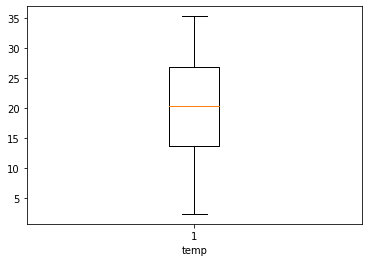

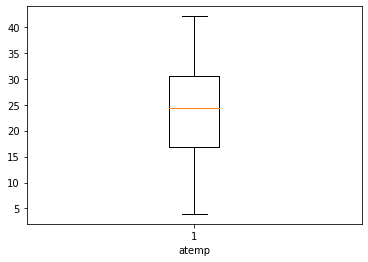

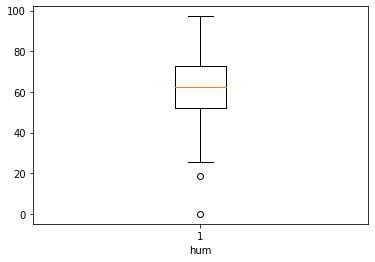

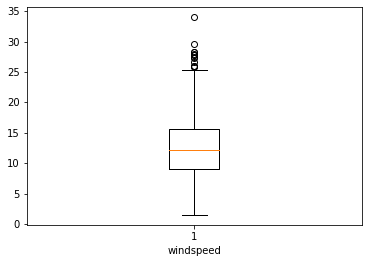

In [13]:
for var in num_vars:
  plt.boxplot(df[var])
  plt.xlabel(var)
  plt.show()

Columns temp, atemp and hum have no outliers. 
Although there are some outliers in windspeed, they are well in range of the distribution. Hence I will not drop any of the values

#### Univariate analysis

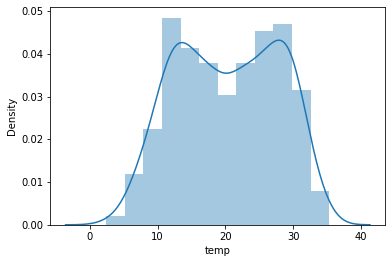

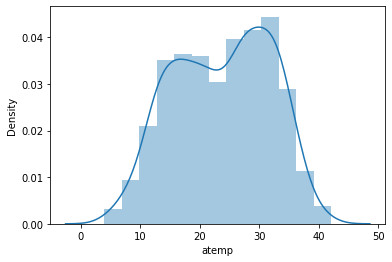

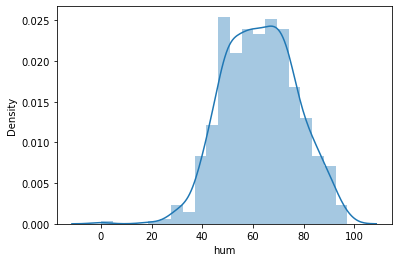

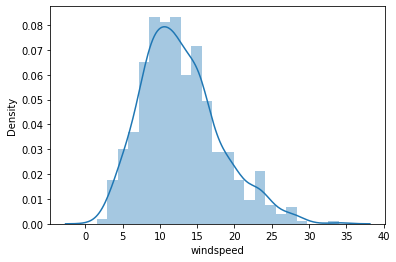

In [14]:
for var in num_vars:
  sns.distplot(df[var])
  plt.show()

**Observations** - All numerical variables roughly show a normal distribution

#### Bivariate Analysis

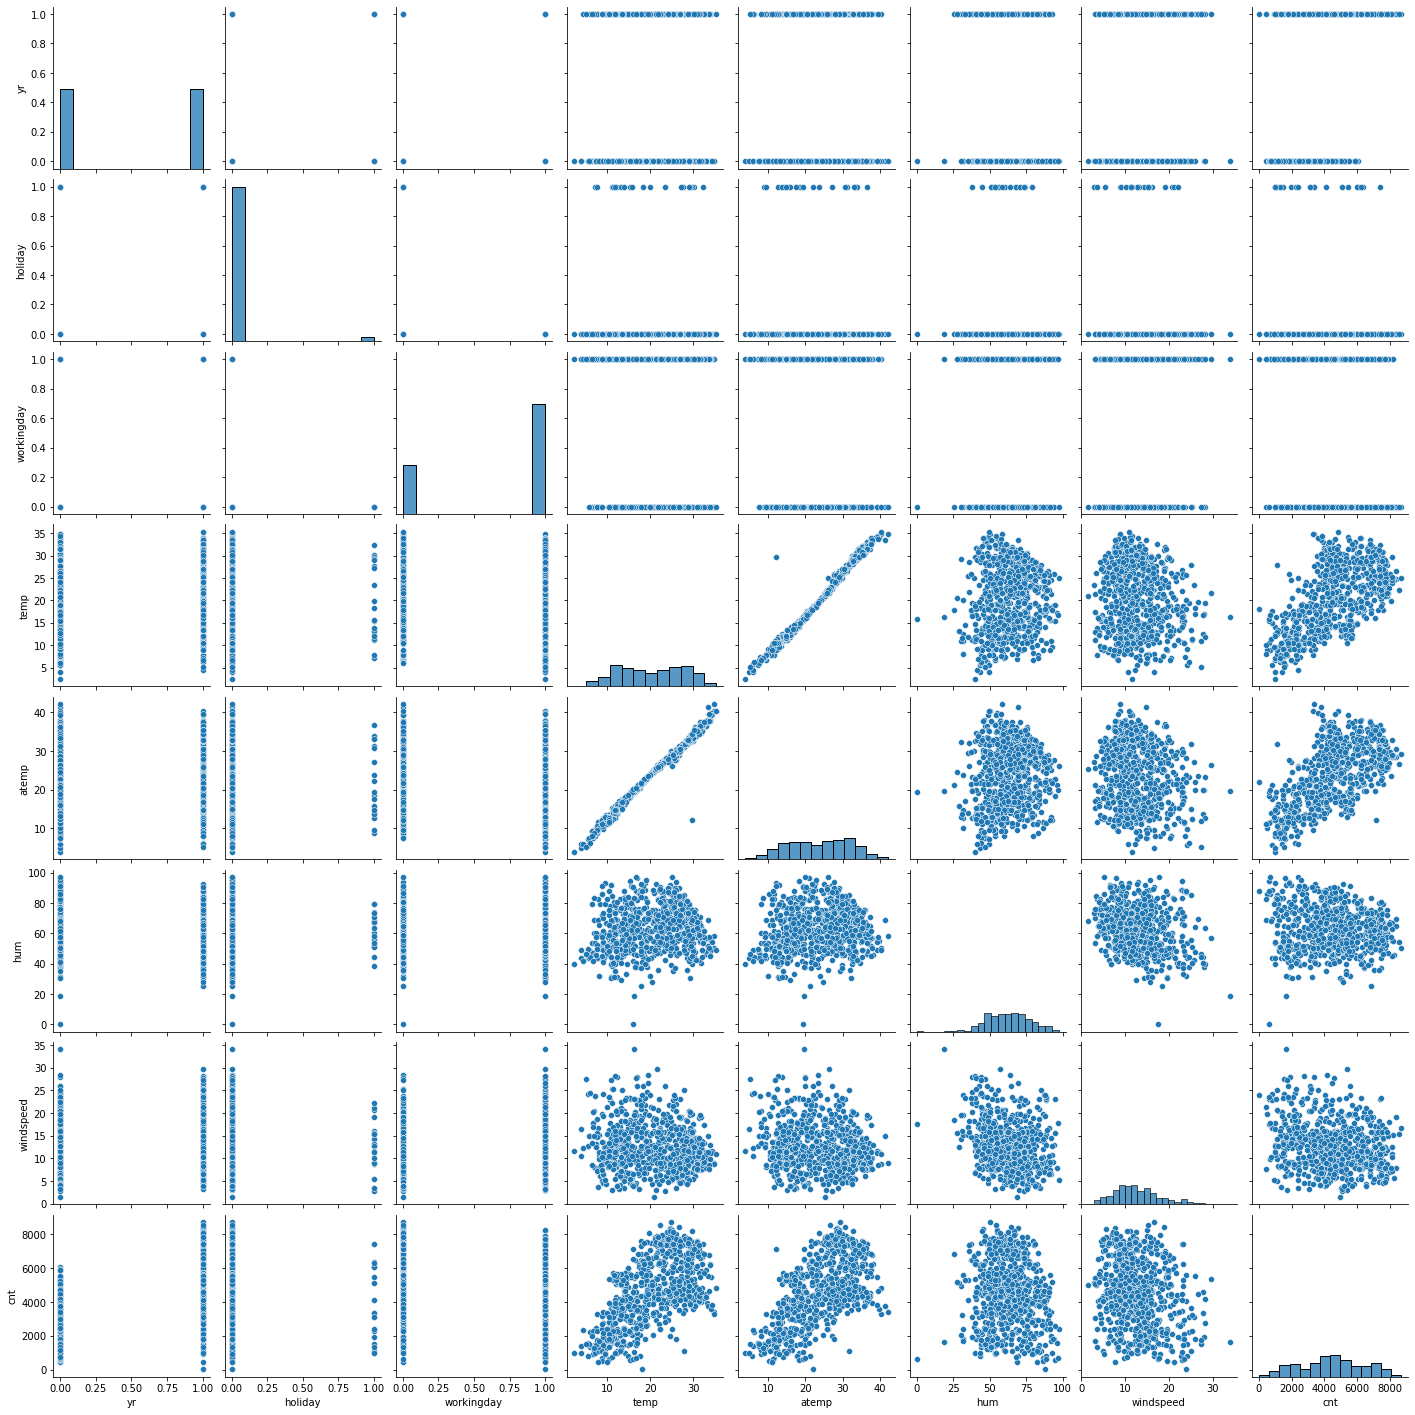

In [15]:
sns.pairplot(df)
plt.show()

**Observations -**

*   Strong linear correlation can be observed between temp and atemp vs cnt
*   There is some sort of relation between hum and windspeed vs cnt
* May have  to drop temp or atemp as they have a strong linear relation with each other

#### There is some linear relation between the predictor variables and the target variables


### Visualising Categorical Variables

In [16]:
# Listing the categorical variables in a list
cat_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

#### Univariate Analysis

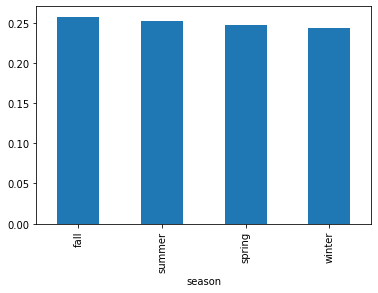

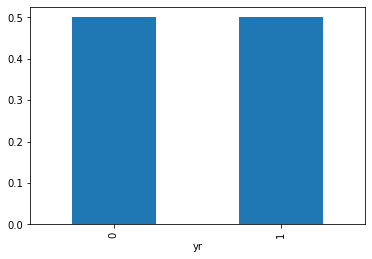

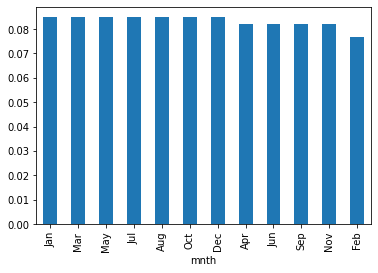

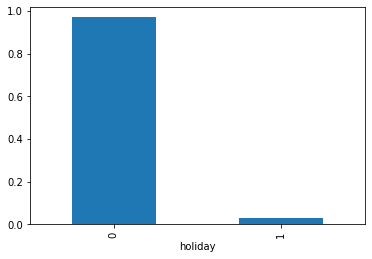

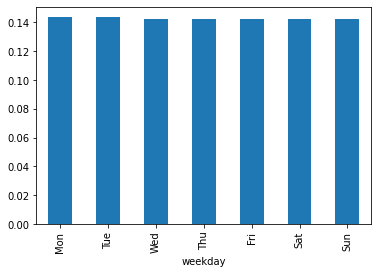

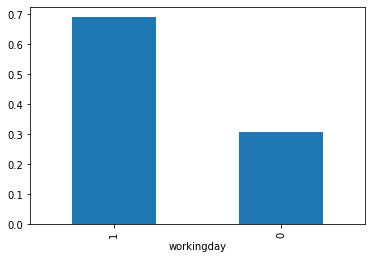

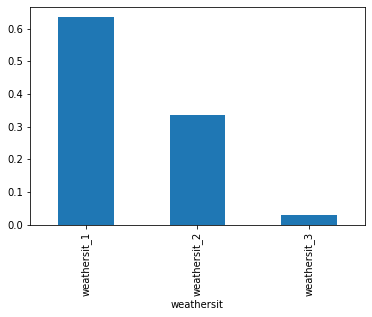

In [17]:
# Bar plots

for var in cat_vars:
  df[var].value_counts(normalize=True).plot.bar()
  plt.xlabel(var)
  plt.show()
  print()

**Observations - **

* Very less deviation in cnt across mnth and weekday
* There is a data imbalance in weathersit, holiday and workingday



#### Bivariate Analysis

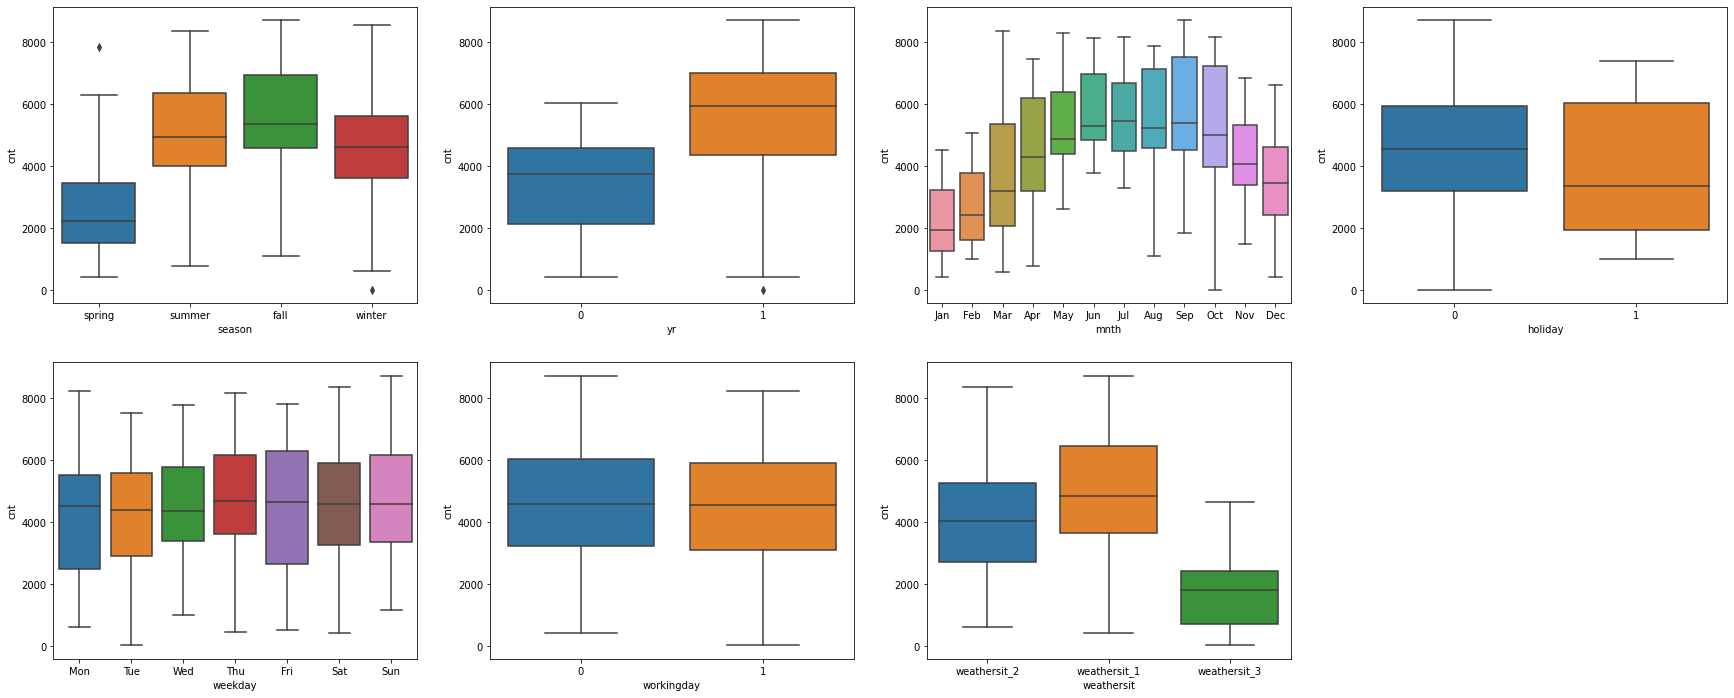

In [18]:
# Boxplots

plt.figure(figsize=(30, 12))

for i, var in enumerate(cat_vars):
  plt.subplot(2,4,i+1)
  sns.boxplot(x = var, y = 'cnt', data = df)

plt.show()

**Observations - **

* The distribution of data is evidently varying  across season, year, month, holiday and weathersit
* There seems to be little deviation in cnt across weekday and workingday


### Correlation Heatmap

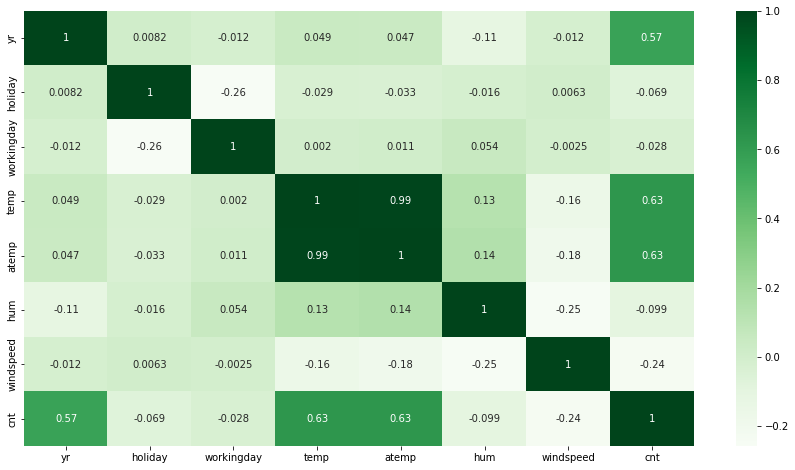

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap="Greens")
plt.show()

**Observations - **Backing the pair plot, temp and atemp have a strong Linear correlation

# 4. Data Preparation

##  Encoding categorical variables

The following columns are already encoded in binary form
* yr: 0-2018 and 1-2019
* holiday: 0-Not Holiday and 1-Holiday
* workingday: 0-Not Workingday and 1-Workingday

The follwing columns are not encoded in a binary form and dummy variables need to be created
* season
* mnth
* weekday
* weathersit

### Dummy variables for season

In [20]:
# Creating dummy variables for 'season'

season_dummies = pd.get_dummies(df['season'], drop_first=True)
season_dummies.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [21]:
# concat the dummy dataframe with original one
df = pd.concat([df, season_dummies], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,Jan,0,Mon,1,weathersit_2,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,Jan,0,Tue,1,weathersit_2,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,Jan,0,Wed,1,weathersit_1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,Jan,0,Thu,1,weathersit_1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,Jan,0,Fri,1,weathersit_1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


### Dummy variables for 'mnth'

In [22]:
# Creating dummy variables for 'mnth'

mnth_dummies = pd.get_dummies(df['mnth'], drop_first=True)
mnth_dummies.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [23]:
# concat the dummy dataframe with original one
df = pd.concat([df, mnth_dummies], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,spring,0,Jan,0,Mon,1,weathersit_2,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,Tue,1,weathersit_2,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,0,Wed,1,weathersit_1,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Thu,1,weathersit_1,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,Fri,1,weathersit_1,9.305237,11.46350,43.6957,...,0,0,1,0,0,0,0,0,0,0


### Dummy variables for 'weekday'

In [24]:
# Creating dummy variables for 'weekday'

weekday_dummies = pd.get_dummies(df['weekday'], drop_first=True)
weekday_dummies.head()

,Mon,Sat,Sun,Thu,Tue,Wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [25]:
# concat the dummy dataframe with original one
df = pd.concat([df, weekday_dummies], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,0,Jan,0,Mon,1,weathersit_2,14.110847,18.18125,80.5833,...,0,0,0,0,1,0,0,0,0,0
1,spring,0,Jan,0,Tue,1,weathersit_2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,1,0
2,spring,0,Jan,0,Wed,1,weathersit_1,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,1
3,spring,0,Jan,0,Thu,1,weathersit_1,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,Jan,0,Fri,1,weathersit_1,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


### Dummy variables for 'weathersit'

In [26]:
# Creating dummy variables for 'weathersit'

weathersit_dummies = pd.get_dummies(df['weathersit'], drop_first=True)
weathersit_dummies.head()

,weathersit_2,weathersit_3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [27]:
# concat the dummy dataframe with original one
df = pd.concat([df, weathersit_dummies], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,weathersit_2,weathersit_3
0,spring,0,Jan,0,Mon,1,weathersit_2,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,1,0
1,spring,0,Jan,0,Tue,1,weathersit_2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,1,0
2,spring,0,Jan,0,Wed,1,weathersit_1,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Thu,1,weathersit_1,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,Fri,1,weathersit_1,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


### Dropping the original columns - season, mnth, weekday and weathersit

In [28]:
df = df.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   spring        730 non-null    uint8  
 9   summer        730 non-null    uint8  
 10  winter        730 non-null    uint8  
 11  Aug           730 non-null    uint8  
 12  Dec           730 non-null    uint8  
 13  Feb           730 non-null    uint8  
 14  Jan           730 non-null    uint8  
 15  Jul           730 non-null    uint8  
 16  Jun           730 non-null    uint8  
 17  Mar           730 non-null    uint8  
 18  May           730 non-null    

## Train and Test data split

In [29]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [30]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,weathersit_2,weathersit_3
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,1,0,0,0,1,0
111,0,0,0,13.803347,16.0977,72.9583,14.707907,1683,0,1,...,0,0,0,0,1,0,0,0,1,0


In [31]:
# Splitting the dataframes into predictor(X) and target(y) variables

y_train = df_train.pop('cnt')
X_train = df_train

## Rescaling the features

In [32]:
# Creating instance of the object
scaler = MinMaxScaler()

In [33]:
# Fit on numeric data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train[num_vars].describe()

,temp,atemp,hum,windspeed
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883
std,0.225858,0.212410,0.145846,0.169803
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179
50%,0.542596,0.529718,0.653714,0.296763
75%,0.735215,0.688457,0.754830,0.414447
max,1.000000,1.000000,1.000000,1.000000


# 5. Train the model

In [34]:
# Read the prepared data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   spring        730 non-null    uint8  
 9   summer        730 non-null    uint8  
 10  winter        730 non-null    uint8  
 11  Aug           730 non-null    uint8  
 12  Dec           730 non-null    uint8  
 13  Feb           730 non-null    uint8  
 14  Jan           730 non-null    uint8  
 15  Jul           730 non-null    uint8  
 16  Jun           730 non-null    uint8  
 17  Mar           730 non-null    uint8  
 18  May           730 non-null    

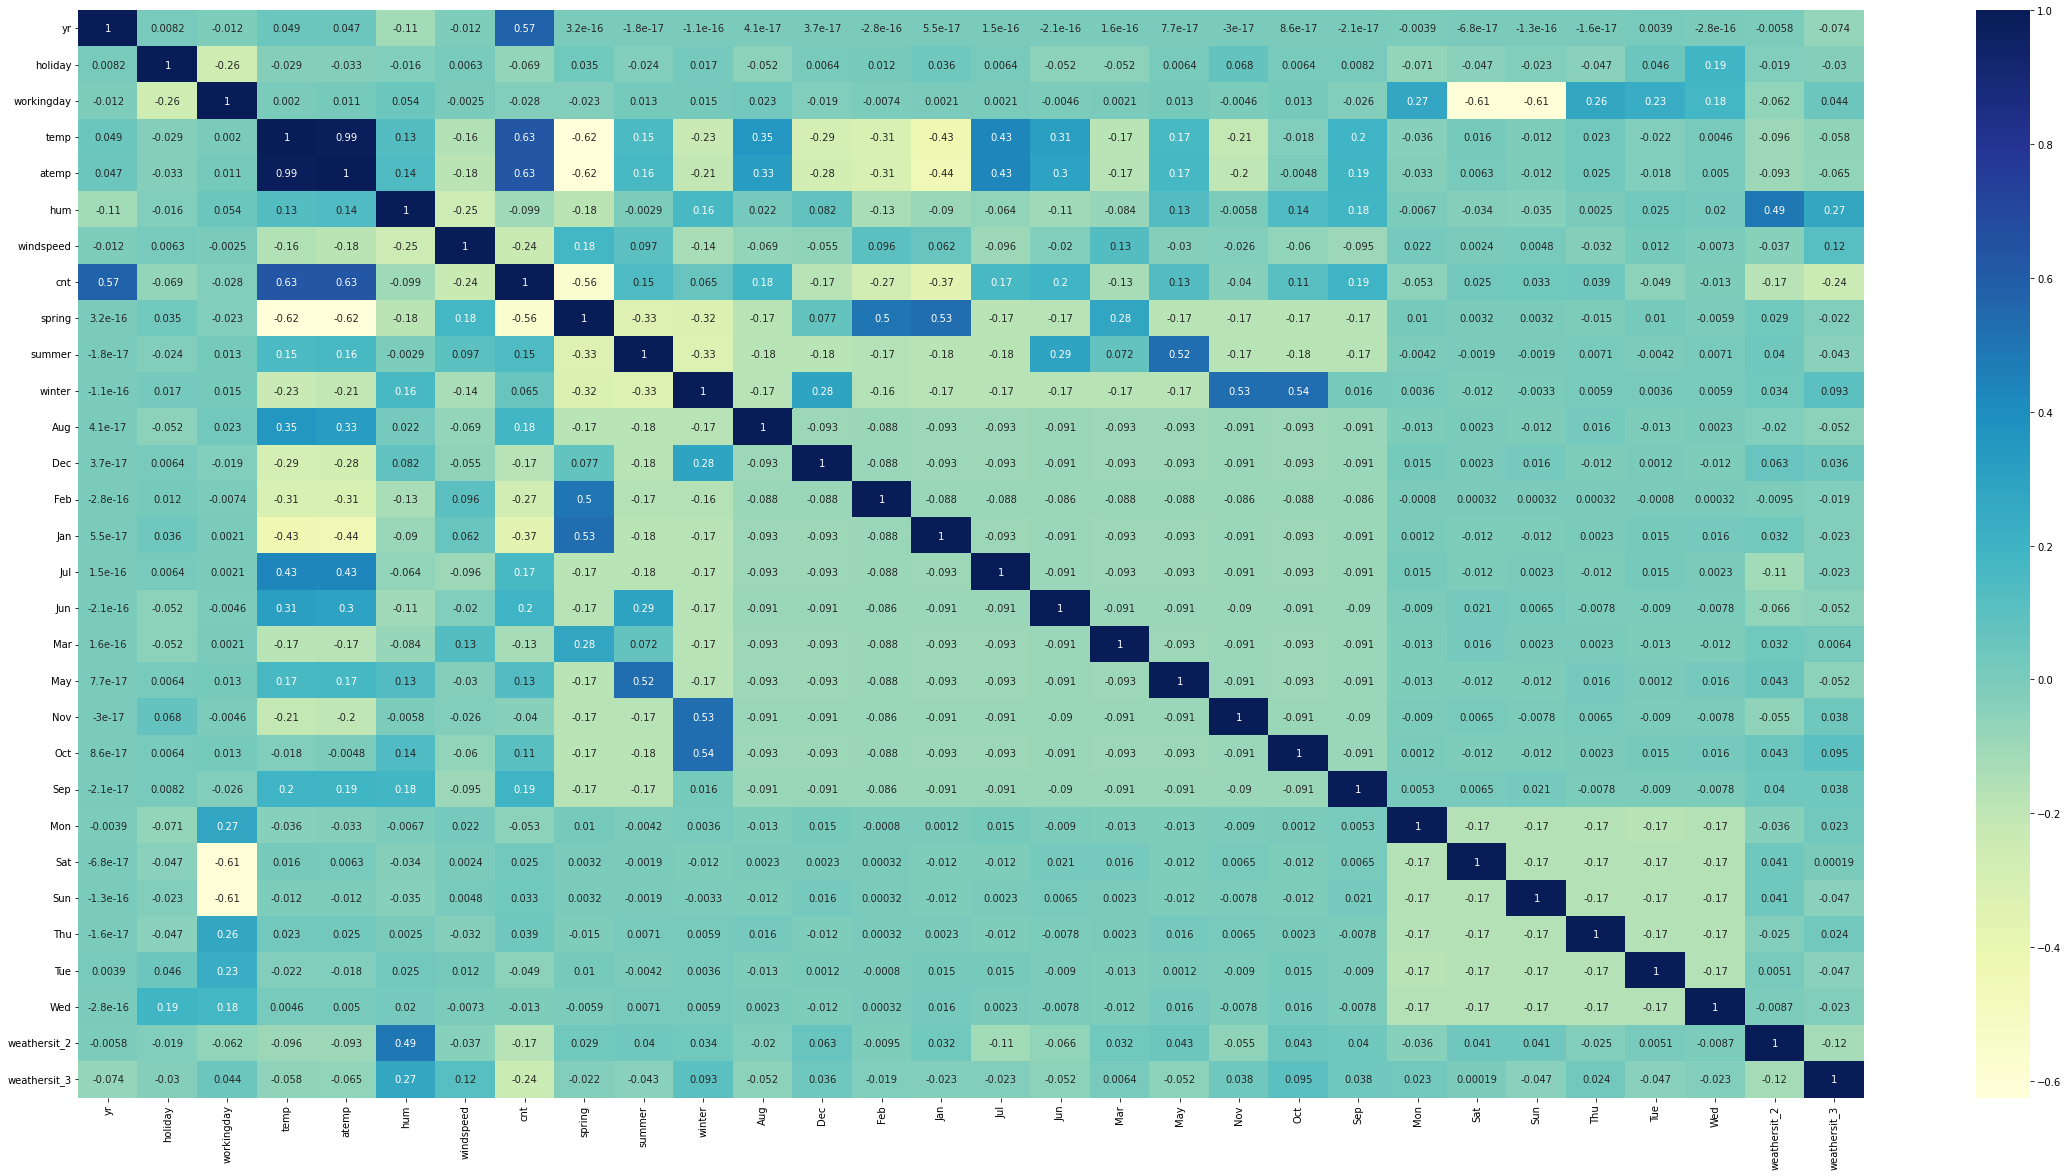

In [35]:
# Quick look on the correlation matrix after data preperation
plt.figure(figsize=[40,20])
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

## Recursive Feature Elimination(RFE) using sklearn

In [36]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# I have not defined the number of variables here, I do not want to eliminate excessive features
# As the number of features are less and I can eliminate any further features later manually
rfe = RFE(lm)                     

rfe = rfe.fit(X_train, y_train)

In [37]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 11),
 ('Dec', False, 2),
 ('Feb', False, 3),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 16),
 ('May', False, 10),
 ('Nov', True, 1),
 ('Oct', False, 14),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', False, 6),
 ('Sun', False, 7),
 ('Thu', False, 15),
 ('Tue', False, 8),
 ('Wed', False, 12),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [38]:
# Columns seelcted by RFE
rfe_cols = list(X_train.columns[rfe.support_])
rfe_cols

['yr',
 'holiday',
 'temp',
 'hum',
 'windspeed',
 'spring',
 'summer',
 'winter',
 'Jan',
 'Jul',
 'Nov',
 'Sep',
 'weathersit_2',
 'weathersit_3']

In [39]:
# Columns dropeed by RFE
drop_cols = list(X_train.columns[~rfe.support_])
drop_cols

['workingday',
 'atemp',
 'Aug',
 'Dec',
 'Feb',
 'Jun',
 'Mar',
 'May',
 'Oct',
 'Mon',
 'Sat',
 'Sun',
 'Thu',
 'Tue',
 'Wed']

## Building using statsmodel, for detailed statistics

In [40]:
# Creating x_train dataframe with RFW selected variables
X_train_rfe = X_train[rfe_cols]

After each iteration, I will check for the following 3 cases 

1. High p-value, high VIF   - Drop the variable
2. - High p-value, low VIF  - Drop first
   - Low p-value, high VIF  - Drop later
3. Low p-value, low VIF     - Retain the variable

In [41]:
# Function to create a model and calculate VIF for each iteration 

def lr_model_func(X_train, X_train_sm, y_train):

  # Create the model
  lr = sm.OLS(y_train, X_train_sm)

  # fit the model
  lr_model = lr.fit()

  # Print the summary of the linear regression model obtained
  print(lr_model.summary())

  # Calculating the VIF
  vif = pd.DataFrame()
  vif['features'] = X_train.columns
  vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(['VIF'], ascending=False)
  print("\nVIF Values are - \n")
  print(vif)

### Iteration 1

In [42]:
# Add Constant
X_train_sm = sm.add_constant(X_train_rfe)

# Build the model
lr_model_func(X_train_rfe, X_train_sm, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          4.41e-189
Time:                        12:13:29   Log-Likelihood:                -4113.7
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     495   BIC:                             8321.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2657.8086    306.565      8.670   

Column 'Nov' has a p-value=0.174>0.05 and a low VIF. I will drop this column and build the model again

In [43]:
# Dropping the variable(Column)

X = X_train_rfe.drop('Nov', axis=1)
drop_cols.append("Nov")

### Iteration 2

In [44]:
# Add Constant
X_train_sm = sm.add_constant(X)

# Build the model
lr_model_func(X, X_train_sm, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          7.59e-190
Time:                        12:13:29   Log-Likelihood:                -4114.7
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     496   BIC:                             8317.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2598.4103    303.711      8.556   

Column 'Jan' has a p-value=0.059>0.05 and a low VIF. I will drop this column and build the model again

In [45]:
# Dropping the variable(Column)

X = X.drop('Jan', axis=1)
drop_cols.append("Jan")

### Iteration 3

In [46]:
# Add Constant
X_train_sm = sm.add_constant(X)

# Build the model
lr_model_func(X, X_train_sm, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          2.95e-190
Time:                        12:13:29   Log-Likelihood:                -4116.5
No. Observations:                 510   AIC:                             8259.
Df Residuals:                     497   BIC:                             8314.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2497.0845    299.726      8.331   

Column 'hum' has VIF=28.03>5 and a low p-value. I will drop this column and build the model again

In [47]:
# Dropping the variable(Column)

X = X.drop('hum', axis=1)
drop_cols.append("hum")

### Iteration 4

In [48]:
# Add Constant
X_train_sm = sm.add_constant(X)

# Build the model
lr_model_func(X, X_train_sm, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          5.06e-187
Time:                        12:13:29   Log-Likelihood:                -4127.0
No. Observations:                 510   AIC:                             8278.
Df Residuals:                     498   BIC:                             8329.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1755.4766    256.961      6.832   

In [49]:
drop_cols

['workingday',
 'atemp',
 'Aug',
 'Dec',
 'Feb',
 'Jun',
 'Mar',
 'May',
 'Oct',
 'Mon',
 'Sat',
 'Sun',
 'Thu',
 'Tue',
 'Wed',
 'Nov',
 'Jan',
 'hum']

### Testing for Two cases
* temp and windspeed have acceptable p-values
* VIF of temp is slightly over 5, but based on the pair-plot we know that cnt is highly correlated with temp 
* I will drop temp and windspeed in two mutually exclusive iterations, build models, do residual analysis and predict the test data for both the cases

### Iteration 5A - Drop windspeed [Case 1]

In [50]:
# Dropping the variable(Column)

X_drop_windspeed = X.drop('windspeed', axis=1, inplace=False)
drop_cols_1 = ['workingday', 'atemp', 'Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Mon', 'Sun', 'Sat', 'Thu', 'Tue', 'Wed', 'Nov', 'Jan', 'hum','windspeed']

In [51]:
# Add Constant
X_train_sm_1 = sm.add_constant(X_drop_windspeed)

# Create the model
lr = sm.OLS(y_train, X_train_sm_1)

# fit the model
lr_model_1 = lr.fit()

# Print the summary of the linear regression model obtained
print(lr_model_1.summary())

# Calculating the VIF
vif = pd.DataFrame()
vif['features'] = X_drop_windspeed.columns
vif['VIF'] = [variance_inflation_factor(X_drop_windspeed.values, i) for i in range(X_drop_windspeed.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(['VIF'], ascending=False)
print("\nVIF Values are - \n")
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.3
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          5.71e-181
Time:                        12:13:29   Log-Likelihood:                -4144.1
No. Observations:                 510   AIC:                             8310.
Df Residuals:                     499   BIC:                             8357.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1326.5047    254.585      5.210   

### Iteration 5B - Drop temp [Case 2]

In [52]:
# Dropping the variable(Column)

X_drop_temp = X.drop('temp', axis=1, inplace=False)
drop_cols_2 = ['workingday', 'atemp', 'Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Mon', 'Sun', 'Sat', 'Thu', 'Tue', 'Wed', 'Nov', 'Jan', 'hum','temp']

In [53]:
# Add Constant
X_train_sm_2 = sm.add_constant(X_drop_temp)

# Create the model
lr = sm.OLS(y_train, X_train_sm_2)

# fit the model
lr_model_2 = lr.fit()

# Print the summary of the linear regression model obtained
print(lr_model_2.summary())

# Calculating the VIF
vif = pd.DataFrame()
vif['features'] = X_drop_temp.columns
vif['VIF'] = [variance_inflation_factor(X_drop_temp.values, i) for i in range(X_drop_temp.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(['VIF'], ascending=False)
print("\nVIF Values are - \n")
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     160.8
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          5.02e-149
Time:                        12:13:29   Log-Likelihood:                -4219.6
No. Observations:                 510   AIC:                             8461.
Df Residuals:                     499   BIC:                             8508.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         5095.6126    146.180     34.858   

# 6A. Residual Analysis, Predictions and Evaluation on the Test set [Case 1]

## Residual Analysis

### Assumption 1 - The Errors follow a normal distribution centered at zero

In [54]:
# Predicting the target variables for the training data set
y_train_pred = lr_model_1.predict(X_train_sm_1)

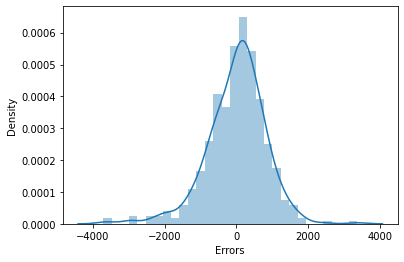

In [55]:
# Checking if the error terms have a normal distribution and are centered around zero
res = y_train - y_train_pred
sns.distplot(res)
plt.xlabel("Errors")
plt.show()

* The error terms have mean zero
* The errors are normally distributed

Hence Assumption 1 is validated

### Assumption 2 - The Errors are independent of each other
### Assumption 3 - The errors have a constant variance throughout the dataset

In [56]:
# Reading the data again

df_eval_1= pd.read_csv("day.csv")
df_eval_1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [57]:
# Using same random state to extract the train data set
df_train_1, df_test_1 = train_test_split(df_eval_1, train_size=0.7, random_state=100)

In [58]:
df_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     510 non-null    int64  
 1   dteday      510 non-null    object 
 2   season      510 non-null    int64  
 3   yr          510 non-null    int64  
 4   mnth        510 non-null    int64  
 5   holiday     510 non-null    int64  
 6   weekday     510 non-null    int64  
 7   workingday  510 non-null    int64  
 8   weathersit  510 non-null    int64  
 9   temp        510 non-null    float64
 10  atemp       510 non-null    float64
 11  hum         510 non-null    float64
 12  windspeed   510 non-null    float64
 13  casual      510 non-null    int64  
 14  registered  510 non-null    int64  
 15  cnt         510 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 67.7+ KB


In [59]:
# Storing the date data and errors in 2 columns
# As seen in the info() the errors are stored in column "0"
df_train_1 = pd.concat([df_eval_1["dteday"], res], axis=1)

In [60]:
df_train_1[0]

0      -546.393515
1      -835.578286
2       -59.288069
3              NaN
4        25.075417
          ...     
725    -948.916581
726      36.626120
727            NaN
728   -1957.951397
729            NaN
Name: 0, Length: 730, dtype: float64

In [61]:
df_train_1.head()

,dteday,0
0,01-01-2018,-546.393515
1,02-01-2018,-835.578286
2,03-01-2018,-59.288069
3,04-01-2018,NaN
4,05-01-2018,25.075417


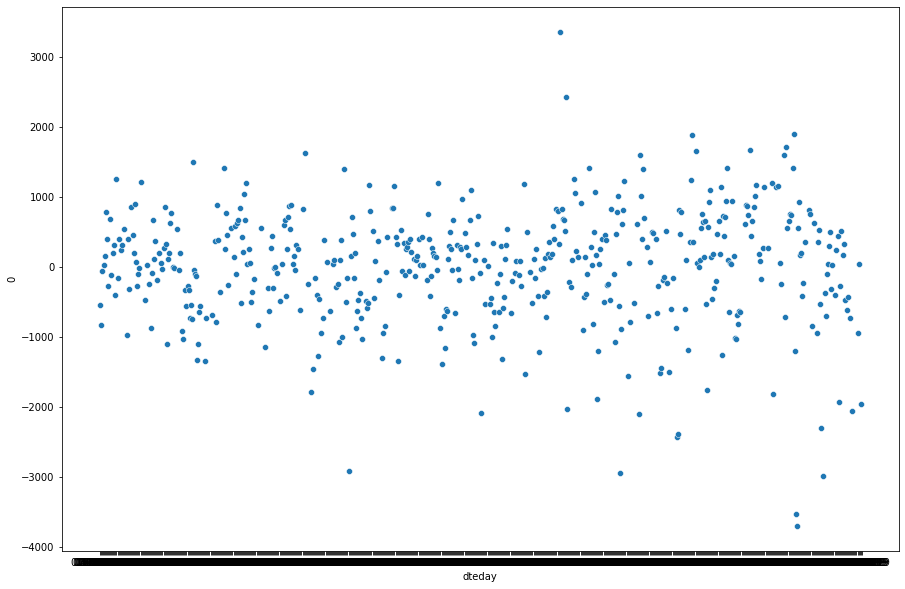

In [62]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df_train_1["dteday"], y=df_train_1[0])
plt.xticks(df_train_1["dteday"])
plt.show()

Observations - 
* The error terms are randomly and evenly distributed around zero
* The error terms have similar variance throughout the dataset

Hence Assumptions 2 and 3 are validated

## Predictions and Evaluation on the Test set

In [63]:
# Perform the same transformation on the test set that were done on the train test

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [64]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,weathersit_2,weathersit_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,4560.559091,0.254545,0.263636,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.318182,0.027273
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,1904.968544,0.436599,0.441609,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,441.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,3312.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,4582.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,5913.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
y_test = df_test.pop('cnt' )
X_test = df_test

In [66]:
# Drop columns
X_test = X_test.drop(drop_cols_1, axis=1)

In [67]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            220 non-null    int64  
 1   holiday       220 non-null    int64  
 2   temp          220 non-null    float64
 3   spring        220 non-null    uint8  
 4   summer        220 non-null    uint8  
 5   winter        220 non-null    uint8  
 6   Jul           220 non-null    uint8  
 7   Sep           220 non-null    uint8  
 8   weathersit_2  220 non-null    uint8  
 9   weathersit_3  220 non-null    uint8  
dtypes: float64(1), int64(2), uint8(7)
memory usage: 8.4 KB


In [68]:
# Add a constant 

X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,temp,spring,summer,winter,Jul,Sep,weathersit_2,weathersit_3
184,1.0,0,1,0.831783,0,0,0,1,0,1,0
535,1.0,1,0,0.901354,0,1,0,0,0,0,0
299,1.0,0,0,0.511964,0,0,1,0,0,1,0
221,1.0,0,0,0.881625,0,0,0,0,0,0,0
152,1.0,0,0,0.817246,0,1,0,0,0,0,0


In [69]:
# Predict
y_test_pred_1 = lr_model_1.predict(X_test_sm)

In [70]:
# Evaluate
r2_score(y_true=y_test, y_pred=y_test_pred_1)

0.8092660294132241

Adj R2(Train Data) = 0.820

R2(Test Data) = 0.809

R2(Test Data)/R2(Train Data) =0.986 [The difference is ~1% < 5%]

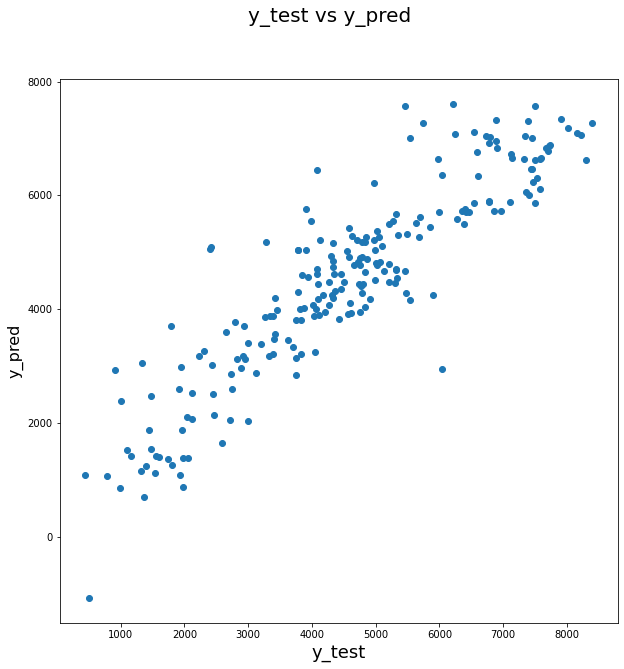

In [71]:
# Plotting a Q-Q Plot between y_test and y_test_pred_1 to understand the spread

fig = plt.figure(figsize=[10,10])
plt.scatter(y_test, y_test_pred_1)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show() 

# 6B. Residual Analysis, Predictions and Evaluation on the Test set [Case 2]

## Residual Analysis

### Assumption 1 - The Errors follow a normal distribution centered at zero

In [72]:
y_train_pred = lr_model_2.predict(X_train_sm_2)

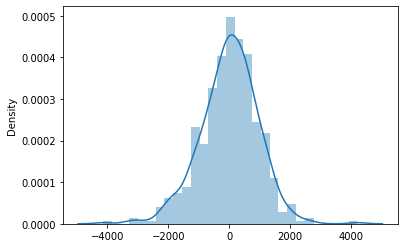

In [73]:
res = y_train - y_train_pred
sns.distplot(res)

* The error terms have mean zero
* The errors are normally distributed

### Assumption 2 - The Errors are independent of each other 
### Assumption 3 - The errors have a constant variance throughout the dataset

* The error terms are centered around Zero
* The errors are normally distributed

Hence Assumption 1 is validated

In [74]:
# Reading the data again

df_eval_2= pd.read_csv("day.csv")
df_eval_2.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [75]:
# Using same random state to extract the train data set
df_train_2, df_test_2 = train_test_split(df_eval_2, train_size=0.7, random_state=100)

In [76]:
df_train_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     510 non-null    int64  
 1   dteday      510 non-null    object 
 2   season      510 non-null    int64  
 3   yr          510 non-null    int64  
 4   mnth        510 non-null    int64  
 5   holiday     510 non-null    int64  
 6   weekday     510 non-null    int64  
 7   workingday  510 non-null    int64  
 8   weathersit  510 non-null    int64  
 9   temp        510 non-null    float64
 10  atemp       510 non-null    float64
 11  hum         510 non-null    float64
 12  windspeed   510 non-null    float64
 13  casual      510 non-null    int64  
 14  registered  510 non-null    int64  
 15  cnt         510 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 67.7+ KB


In [77]:
# Storing the date data and errors in 2 columns
# As seen in the info() the errors are stored in column "0"
df_train_2 = pd.concat([df_eval_2["dteday"], res], axis=1)

In [78]:
df_train_2[0]

0      -344.694496
1      -247.971570
2      -478.264757
3              NaN
4      -422.954700
          ...     
725    -759.784786
726    -399.107470
727            NaN
728   -1853.366121
729            NaN
Name: 0, Length: 730, dtype: float64

In [79]:
df_train_2.head()

,dteday,0
0,01-01-2018,-344.694496
1,02-01-2018,-247.971570
2,03-01-2018,-478.264757
3,04-01-2018,NaN
4,05-01-2018,-422.954700


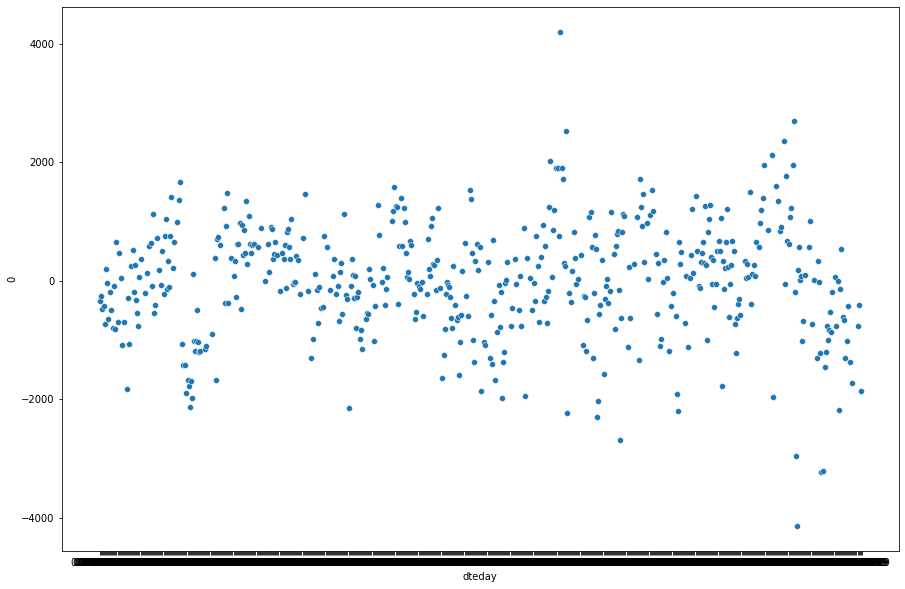

In [80]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df_train_2["dteday"], y=df_train_2[0])
plt.xticks(df_train_2["dteday"])
plt.show()

Observations - 
* The error terms are more towards the positive side
* The error terms have similar variance throughout the dataset

Assumption 2 is not validated 
Assumption 3 is validated

## Predictions and Evaluation on the Test set

In [81]:
# y_test = df_test.pop('cnt')
X_test = df_test

In [82]:
# Drop columns
X_test = X_test.drop(drop_cols_2, axis=1)

In [83]:
# Add a constant 

X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,windspeed,spring,summer,winter,Jul,Sep,weathersit_2,weathersit_3
184,1.0,0,1,0.084219,0,0,0,1,0,1,0
535,1.0,1,0,0.153728,0,1,0,0,0,0,0
299,1.0,0,0,0.334206,0,0,1,0,0,1,0
221,1.0,0,0,0.339570,0,0,0,0,0,0,0
152,1.0,0,0,0.537414,0,1,0,0,0,0,0


In [84]:
# Predict
y_test_pred_2 = lr_model_2.predict(X_test_sm)

In [85]:
# Evaluate
r2_score(y_true = y_test, y_pred=y_test_pred_2)

0.7413934758923719

Adj R2(Train Data) = 0.758

R2(Test Data) = 0.741

R2(Test Data)/R2(Train Data) =0.977 [The difference is ~2% < 5%]

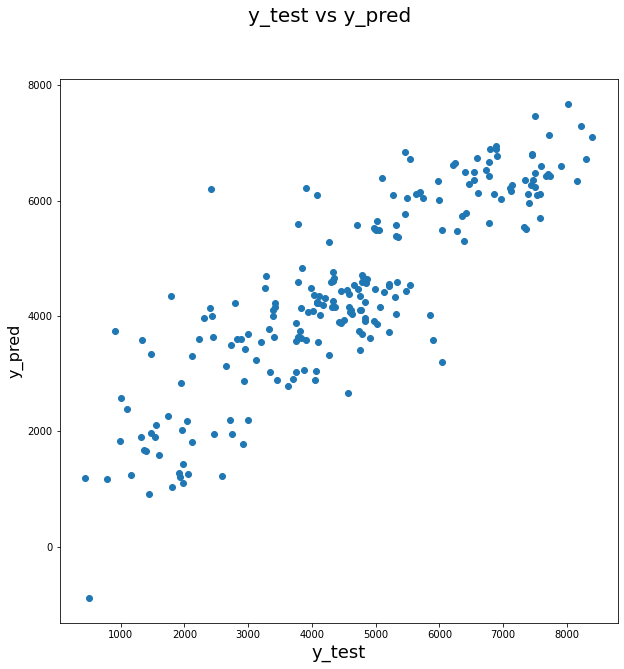

In [86]:
# Plotting a Q-Q Plot between y_test and y_pred to understand the spread

fig = plt.figure(figsize=[10,10])
plt.scatter(y_test, y_test_pred_2)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show() 

# 7. Conclusion


## I will go ahead with Case 1 i.e, drop the variable windspeed for the following reasons

* Case 1 has a greater R2 value of 0.809(Test data)
* The assumptions of Linear Regression are being fulfilled by case 1 and not by case 2
* As evident from the Q-Q plots of both the models. The predictions in y_test_pred_1 have a narrow spread(Less Variance) than Case 2


### Hence, the equation of our best fitted line is given by,



cnt =

      1326.5047
      + yr * 2021.7426
      - holiday * 871.4501
      + temp * 4371.3235
      - spring * 665.7121
      + summer * 318.5666
      + winter * 720.3879
      - Jul * 454.9198
      + Sep * 705.6362
      - weathersit_2 * 681.9603
      + weathersit_3 * 2598.4215

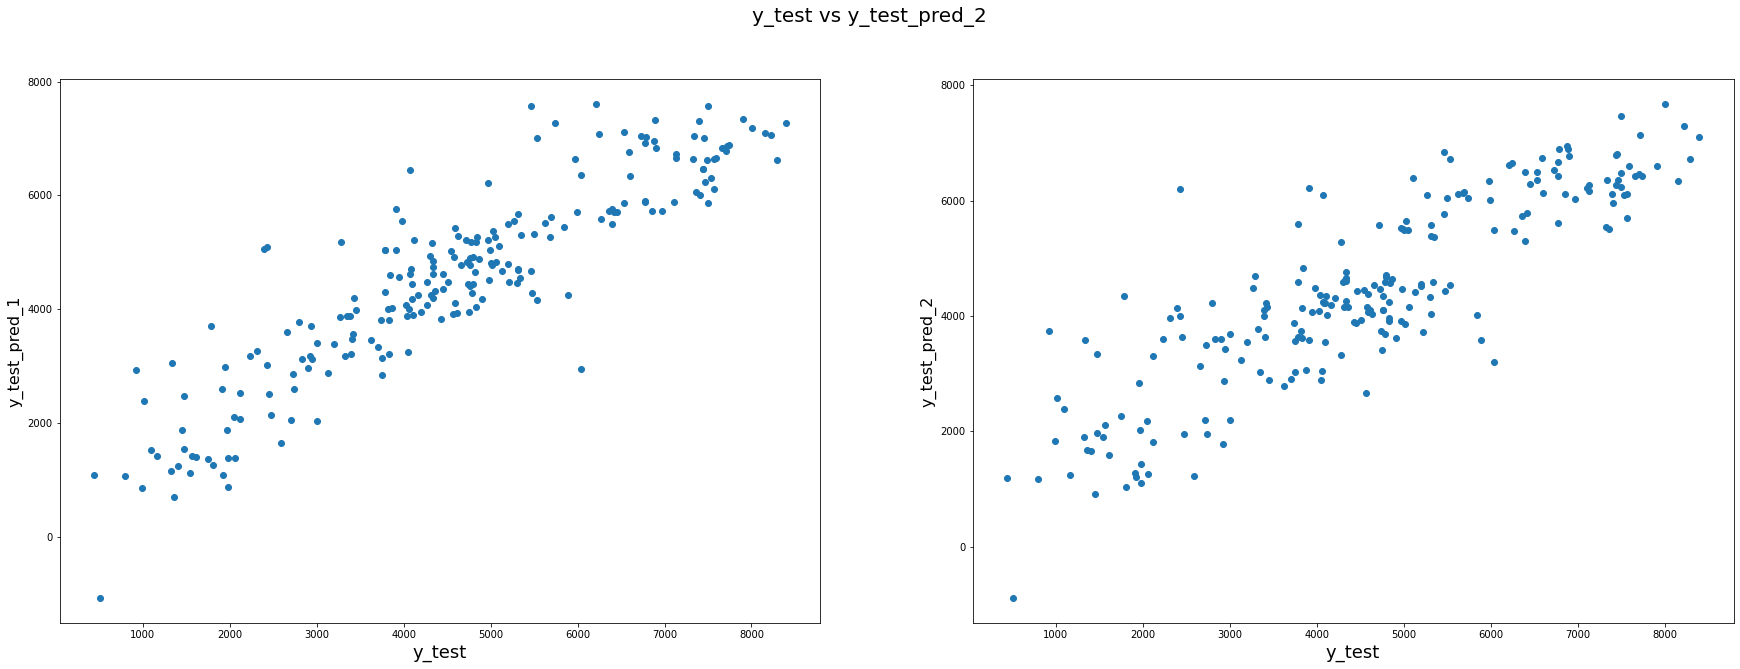

In [87]:
# Plotting y_test and y_test_pred_1 to understand the spread

fig = plt.figure(figsize=[30,10])
plt.subplot(1,2,1)
plt.scatter(y_test, y_test_pred_1)
fig.suptitle('y_test vs y_test_pred_1', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred_1', fontsize = 16) 

plt.subplot(1,2,2)
plt.scatter(y_test, y_test_pred_2)
fig.suptitle('y_test vs y_test_pred_2', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred_2', fontsize = 16) 
plt.show() 